# Basic:

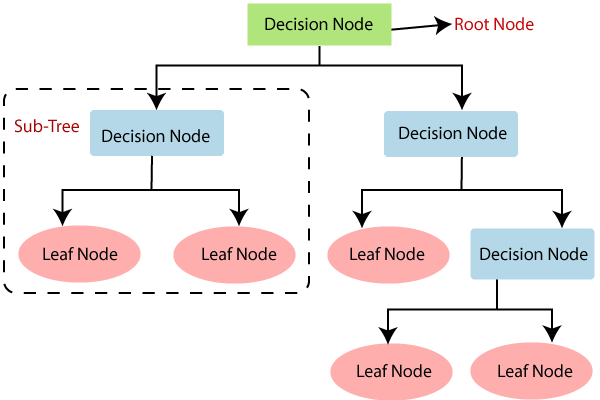


<p dir="ltr">CART is an umbrella word that refers to the following types of decision trees:</p>

<ul>
	<li dir="ltr">
	<p dir="ltr"><strong>Classification Trees:</strong> When the target variable is categorical, the tree is used to find the "class" into which the target variable is most likely to fall.</p>
	</li>
	<li dir="ltr">
	<p dir="ltr"><strong>Regression trees:</strong> These are used to forecast the value of a continuous variable.</p>
	</li>
</ul>


https://www.mldawn.com/the-decision-tree-algorithm-information-gain/


# Entropy 

Entropy is a measure of disorder (like in thermodynamics IInd law). 

We divide the given dataset into subset by means of the predictors.

Some predictor will classify the dataset in subset without any error or entropy or impurity 

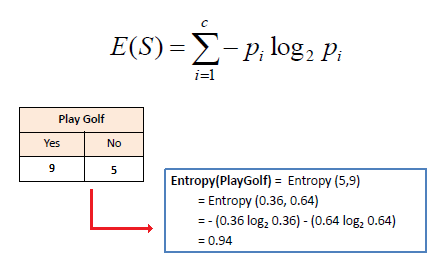

# Info gain

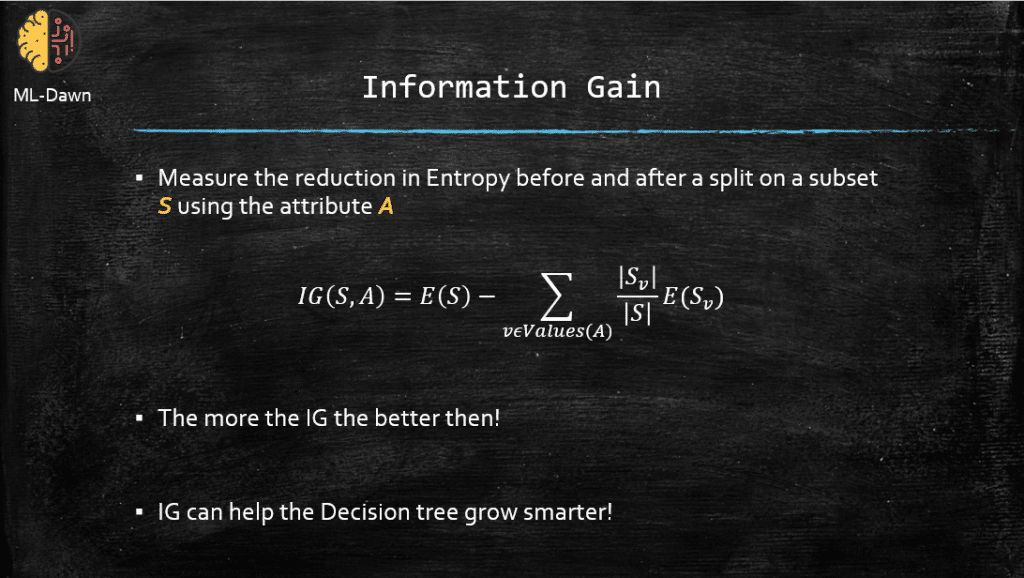

In [1]:
import pandas as pd 
import numpy as np 

file_path= r"D:\ERA_ML\Data_Analytics\Dataset\week_12\Week 12 (Important data)-20220425T104714Z-001\Week 12 (Important data)\CART.xlsx"
df = pd.read_excel(file_path)

In [2]:
df

,RID,age,income,student,credit_rating,buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


 # What we understand from data 
 
 Predictors  :  age , income , student , credit rating --> All are categorical data 
 
 Label :  buys_computer -->   Categorical data 
 
 So we are goigng to perform categorical algorithm ., 
 


In [109]:
# Lets calculate the entropy of the dataset as given
import warnings
warnings.filterwarnings('ignore')

def calculate_entropy(no_of_yes,no_of_nos):

    #Find the probablity (Propotion) in overall 
    proportion_yes = no_of_yes/(no_of_yes+no_of_nos)
    proportion_nos= no_of_nos/(no_of_yes+no_of_nos)
    print('The proportion of Yes : ', round(proportion_yes,2))
    print('The proportion of Nos: ', round(proportion_nos,2))


    # Equation of entropy 

    entropy = -(proportion_yes*np.log2(proportion_yes))-(proportion_nos*np.log2(proportion_nos))
    print('the entropy  : ', round(entropy,2))
    return entropy
    
    
# Count the labels from the training dataset 
no_of_yes, no_of_nos = df['buys_computer'].value_counts()
print('No of Yes :', no_of_yes)
print('No of No"s :', no_of_nos)    
    
root_entropy = calculate_entropy(no_of_yes,no_of_nos)

    

No of Yes : 9
No of No"s : 5
The proportion of Yes :  0.64
The proportion of Nos:  0.36
the entropy  :  0.94


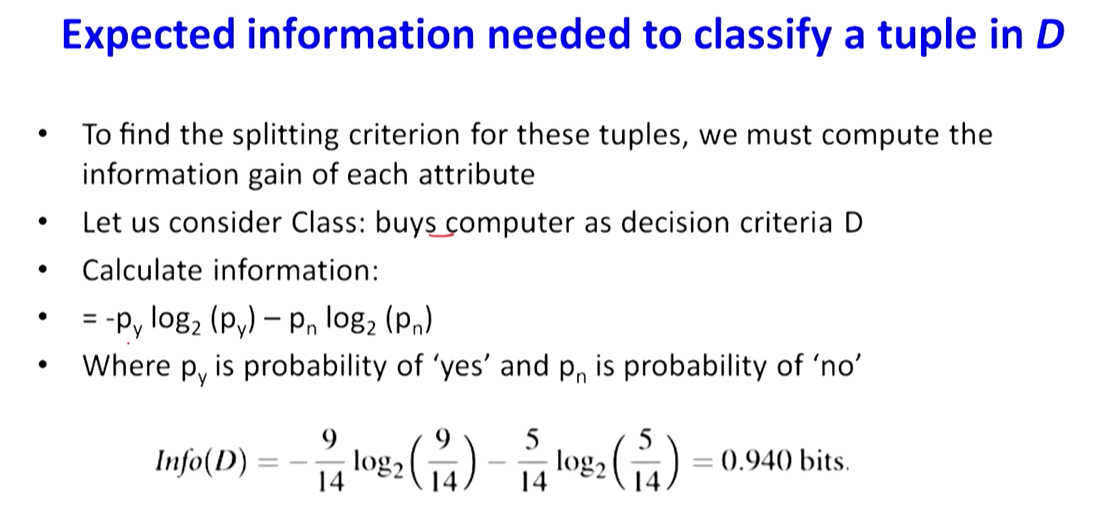

# Info gain 

#### Lets calculate the information gain for the predictor age 

#### age has three distinct values -->  youth , middle_age ,  senior 


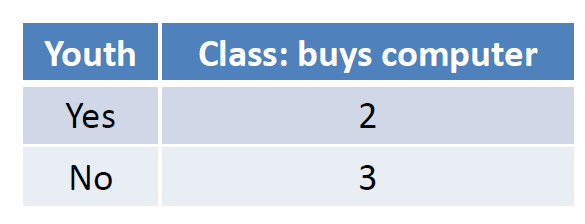

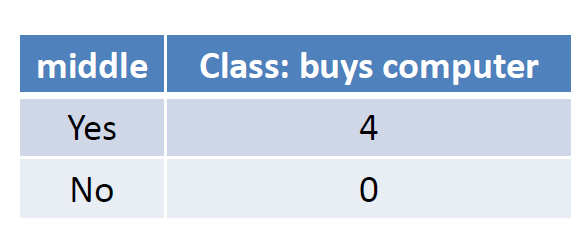

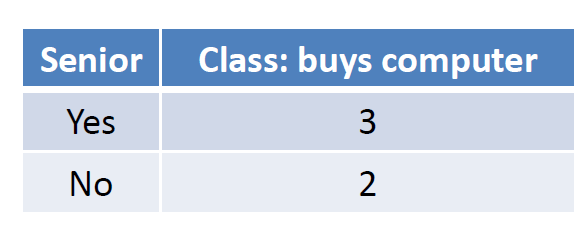


In [110]:

def calculate_info_gain(inp_dict, predictor):
    
    #{'youth': [5, 0.9709505944546686], 'middle_aged': [4, nan], 'senior': [5, 0.9709505944546686]}
    
    res = 0
    for each_k, each_v in inp_dict.items():
        weighted_avg_factor= each_v[0]/len(df[predictor])
        #print(type(each_v[1]))
        if not np.isnan(each_v[1]):
            #print('Inside if')
            weighted_res= weighted_avg_factor*each_v[1]
            res+=weighted_res
            #print(res)
        else:
            print('Found NaN value for entropy --> {}'.format(each_k, ))
            
#     print('Info_gain :' , res)
    return res
    





def preparation_info_gain(predictor, label):
    dict_res = {}

    for each in df[predictor].unique() :
        df2=df.loc[df[predictor] == each, label].value_counts().to_dict()
        print(each , df2)
        try:
            entropy = calculate_entropy(no_of_yes=df2['yes'],no_of_nos=df2['no'])
        except KeyError:
            entropy = calculate_entropy(no_of_yes=df2['yes'],no_of_nos=0)
        dict_res[each]=[len(df.loc[df[predictor] == each]),entropy]
        print('**************')

    print(dict_res)

    # weighted average of entropy to be summed up for all distinct values 

    info_gain_value = calculate_info_gain(dict_res, predictor)
    
    final_ig_value = root_entropy-info_gain_value
    
    print('The info gain value for {} : {}'.format(predictor,final_ig_value))
    print(25*'#')

    
predictor = 'age'
label = 'buys_computer'
preparation_info_gain(predictor, label)


youth {'no': 3, 'yes': 2}
The proportion of Yes :  0.4
The proportion of Nos:  0.6
the entropy  :  0.97
**************
middle_aged {'yes': 4}
The proportion of Yes :  1.0
The proportion of Nos:  0.0
the entropy  :  nan
**************
senior {'yes': 3, 'no': 2}
The proportion of Yes :  0.6
The proportion of Nos:  0.4
the entropy  :  0.97
**************
{'youth': [5, 0.9709505944546686], 'middle_aged': [4, nan], 'senior': [5, 0.9709505944546686]}
Found NaN value for entropy --> middle_aged
The info gain value for age : 0.24674981977443933
#########################


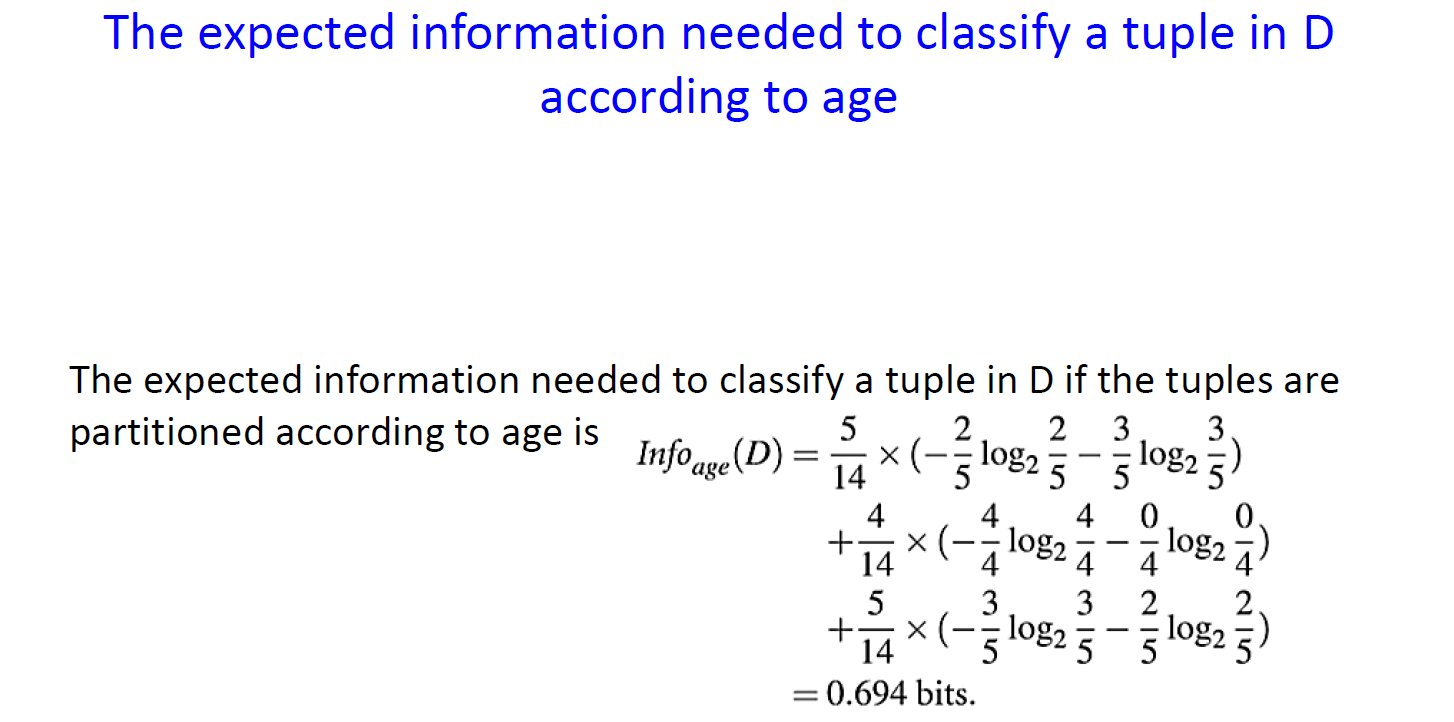

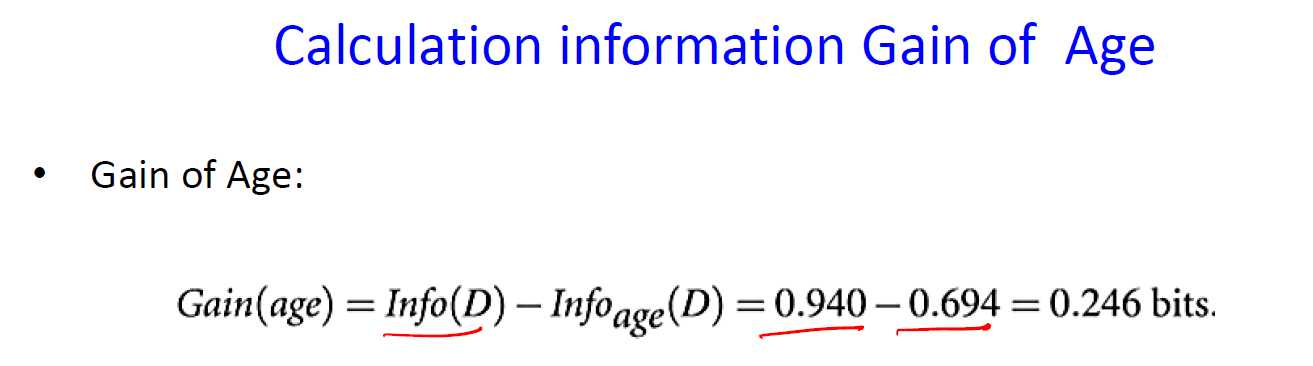

In [112]:
predictor = 'income'
label = 'buys_computer'
preparation_info_gain(predictor, label)


predictor = 'student'
label = 'buys_computer'
preparation_info_gain(predictor, label)

predictor = 'credit_rating'
label = 'buys_computer'
preparation_info_gain(predictor, label)

high {'yes': 2, 'no': 2}
The proportion of Yes :  0.5
The proportion of Nos:  0.5
the entropy  :  1.0
**************
medium {'yes': 4, 'no': 2}
The proportion of Yes :  0.67
The proportion of Nos:  0.33
the entropy  :  0.92
**************
low  {'yes': 3, 'no': 1}
The proportion of Yes :  0.75
The proportion of Nos:  0.25
the entropy  :  0.81
**************
{'high': [4, 1.0], 'medium': [6, 0.9182958340544896], 'low ': [4, 0.8112781244591328]}
The info gain value for income : 0.02922256565895487
#########################
no {'no': 4, 'yes': 3}
The proportion of Yes :  0.43
The proportion of Nos:  0.57
the entropy  :  0.99
**************
yes {'yes': 6, 'no': 1}
The proportion of Yes :  0.86
The proportion of Nos:  0.14
the entropy  :  0.59
**************
{'no': [7, 0.9852281360342515], 'yes': [7, 0.5916727785823275]}
The info gain value for student : 0.15183550136234159
#########################
fair {'yes': 6, 'no': 2}
The proportion of Yes :  0.75
The proportion of Nos:  0.25
the entrop

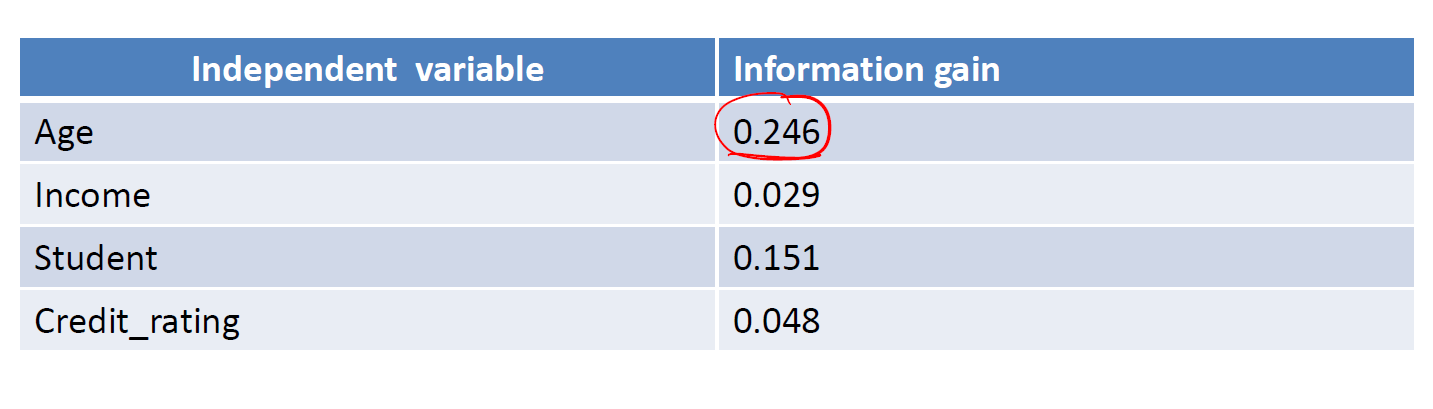

# We choose the Age as a splitting attribute since it has high IG value out of all predictors 

*****We have to continue the same way to form further splits******

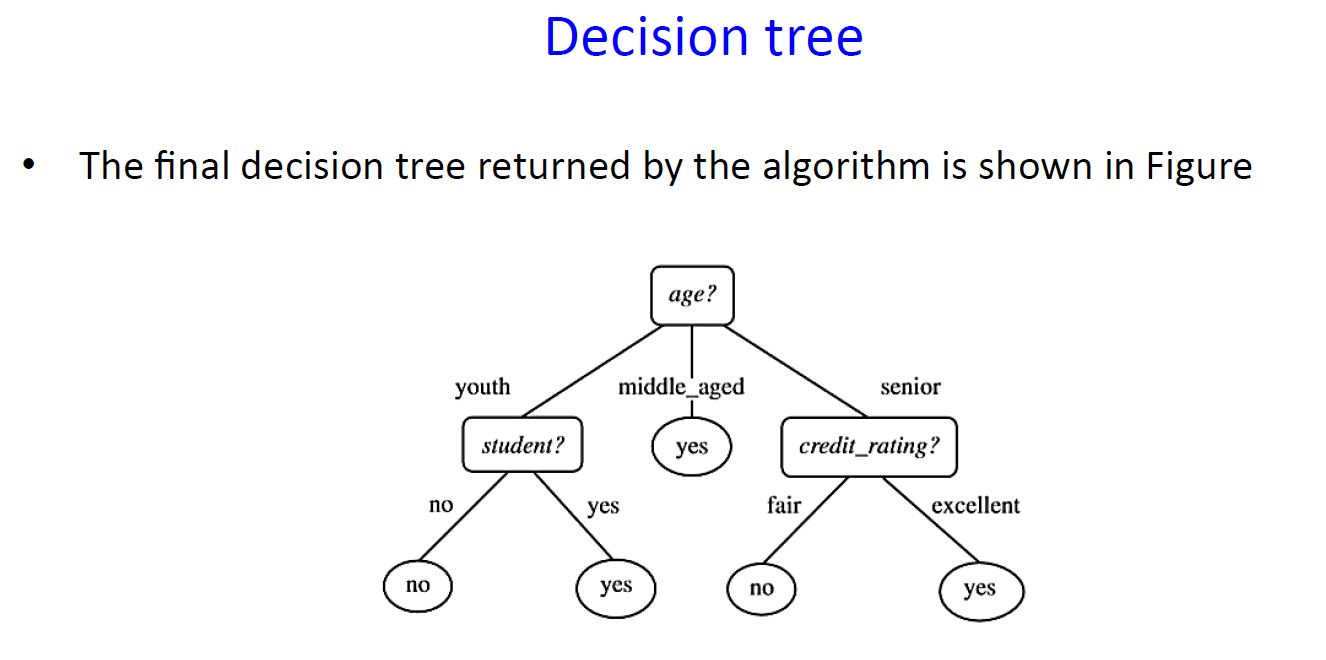